# Monthly Spending — Project Proposal

**Course:** CS 3120 Machine Learning 
**Author:** Casillas, Alejandro  
**Dataset:** Monthly Spending for EDA  

In [13]:
import os, glob, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajatkhairnar/monthly-spending-for-eda")

print("Path to dataset files:", path)

pd.set_option('display.max_columns', 100)

Path to dataset files: /kaggle/input/monthly-spending-for-eda


## 1) Load Data

In [14]:
def find_csv_paths():
    candidates = []
    for root, _, files in os.walk('/kaggle/input/monthly-spending-for-eda/'):
        for f in files:
            if f.lower().endswith('.csv'):
                candidates.append(os.path.join(root, f))
    for f in glob.glob('*.csv'):
        candidates.append(os.path.abspath(f))
    return candidates

csvs = find_csv_paths()
if not csvs:
    raise FileNotFoundError('No CSV files found. Upload the dataset or add it via Kaggle Datasets.')

csv_path = csvs[0]
print('Using CSV:', csv_path)
df = pd.read_csv(csv_path)
print('Shape:', df.shape)
df.head()

Using CSV: /kaggle/input/monthly-spending-for-eda/monthly_spending_dataset_2020_2025.csv
Shape: (69, 14)


,Month,Groceries (₹),Rent (₹),Transportation (₹),Gym (₹),Utilities (₹),Healthcare (₹),Investments (₹),Savings (₹),EMI/Loans (₹),Dining & Entertainment (₹),Shopping & Wants (₹),Total Expenditure (₹),Income (₹)
0,2020-01-01,4860,10000,2595,888,1520,1930,4311,4232,0,3138,1121,30363,40000
1,2020-02-01,6135,10000,2371,851,1630,1923,5939,7329,0,3185,2332,34366,40000
2,2020-03-01,6853,10000,2715,1143,1776,1185,4700,3625,0,2684,1459,32515,36000
3,2020-04-01,6904,10000,2582,869,1975,1274,4420,6426,0,2475,2806,33305,36000
4,2020-05-01,4562,10000,3028,830,1984,1631,4410,3647,0,2146,1020,29611,36000


## 2) Basic Cleaning & Schema

In [15]:
# Standardize column names
df.columns = [c.strip().replace(' ', '_') for c in df.columns]

# Identify potential date/month column and parse
date_cols_guess = [c for c in df.columns if re.search(r'(date|month|year)', c, re.I)]
date_col = date_cols_guess[0] if date_cols_guess else None
if date_col is not None:
    try:
        df[date_col] = pd.to_datetime(df[date_col])
        df = df.sort_values(date_col)
    except Exception as e:
        print('Date parse warning:', e)

# Numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', num_cols)

display(df.head())
display(df.describe(include='all'))
df.isna().sum().sort_values(ascending=False).head(20)

Numeric columns: ['Groceries_(₹)', 'Rent_(₹)', 'Transportation_(₹)', 'Gym_(₹)', 'Utilities_(₹)', 'Healthcare_(₹)', 'Investments_(₹)', 'Savings_(₹)', 'EMI/Loans_(₹)', 'Dining_&_Entertainment_(₹)', 'Shopping_&_Wants_(₹)', 'Total_Expenditure_(₹)', 'Income_(₹)']


,Month,Groceries_(₹),Rent_(₹),Transportation_(₹),Gym_(₹),Utilities_(₹),Healthcare_(₹),Investments_(₹),Savings_(₹),EMI/Loans_(₹),Dining_&_Entertainment_(₹),Shopping_&_Wants_(₹),Total_Expenditure_(₹),Income_(₹)
0,2020-01-01,4860,10000,2595,888,1520,1930,4311,4232,0,3138,1121,30363,40000
1,2020-02-01,6135,10000,2371,851,1630,1923,5939,7329,0,3185,2332,34366,40000
2,2020-03-01,6853,10000,2715,1143,1776,1185,4700,3625,0,2684,1459,32515,36000
3,2020-04-01,6904,10000,2582,869,1975,1274,4420,6426,0,2475,2806,33305,36000
4,2020-05-01,4562,10000,3028,830,1984,1631,4410,3647,0,2146,1020,29611,36000


,Month,Groceries_(₹),Rent_(₹),Transportation_(₹),Gym_(₹),Utilities_(₹),Healthcare_(₹),Investments_(₹),Savings_(₹),EMI/Loans_(₹),Dining_&_Entertainment_(₹),Shopping_&_Wants_(₹),Total_Expenditure_(₹),Income_(₹)
count,69,69.000000,69.00000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2022-10-31 14:36:31.304347904,6286.913043,11000.00000,2569.260870,967.768116,1978.898551,1750.420290,6317.000000,7612.550725,1130.434783,2739.594203,1963.753623,36704.043478,50446.376812
min,2020-01-01 00:00:00,4154.000000,10000.00000,1501.000000,700.000000,1514.000000,837.000000,3952.000000,3625.000000,0.000000,1501.000000,1020.000000,28791.000000,36000.000000
25%,2021-06-01 00:00:00,5158.000000,10000.00000,2095.000000,851.000000,1683.000000,1289.000000,5161.000000,6072.000000,0.000000,2146.000000,1470.000000,32829.000000,43200.000000
50%,2022-11-01 00:00:00,6368.000000,10000.00000,2604.000000,1001.000000,1980.000000,1635.000000,6255.000000,7329.000000,0.000000,2743.000000,1902.000000,34111.000000,48000.000000
75%,2024-04-01 00:00:00,6931.000000,13000.00000,3035.000000,1084.000000,2240.000000,2068.000000,7089.000000,9430.000000,0.000000,3185.000000,2369.000000,40672.000000,64000.000000
max,2025-09-01 00:00:00,8983.000000,13000.00000,3482.000000,1196.000000,2471.000000,2958.000000,9496.000000,12074.000000,6000.000000,3991.000000,2981.000000,49167.000000,64000.000000
std,NaN,1233.330400,1424.57424,577.704373,149.508523,304.688228,577.078173,1459.367671,2257.266674,2363.403848,679.530641,578.126803,5843.735745,10268.750135


Month                         0
Groceries_(₹)                 0
Rent_(₹)                      0
Transportation_(₹)            0
Gym_(₹)                       0
Utilities_(₹)                 0
Healthcare_(₹)                0
Investments_(₹)               0
Savings_(₹)                   0
EMI/Loans_(₹)                 0
Dining_&_Entertainment_(₹)    0
Shopping_&_Wants_(₹)          0
Total_Expenditure_(₹)         0
Income_(₹)                    0
dtype: int64

### Handle Missing Values (Simple Strategy)

In [16]:
df[num_cols] = df[num_cols].apply(lambda s: s.fillna(s.median()))
if date_col is not None and df[date_col].isna().any():
    df[date_col] = df[date_col].fillna(method='ffill').fillna(method='bfill')
df.isna().sum().sum()

0

### Define Target (Total Spending)

In [17]:
possible_total = ['Total','Total_Spending','TotalSpending','Total_Expense','Total_Expenses']
total_col = None
for name in possible_total:
    if name in df.columns:
        total_col = name
        break

if total_col is None:
    expense_like = [c for c in num_cols if not re.search(r'(income|saving|savings|balance)', c, re.I)]
    if date_col is not None and date_col in expense_like:
        expense_like.remove(date_col)
    df['Total_Spending_Est'] = df[expense_like].sum(axis=1)
    total_col = 'Total_Spending_Est'

print('Target column for later modeling:', total_col)
df[total_col].describe()

Target column for later modeling: Total_Spending_Est


count       69.000000
mean     73408.086957
std      11687.471489
min      57582.000000
25%      65658.000000
50%      68222.000000
75%      81344.000000
max      98334.000000
Name: Total_Spending_Est, dtype: float64

## 3) Exploratory Data Analysis (EDA)

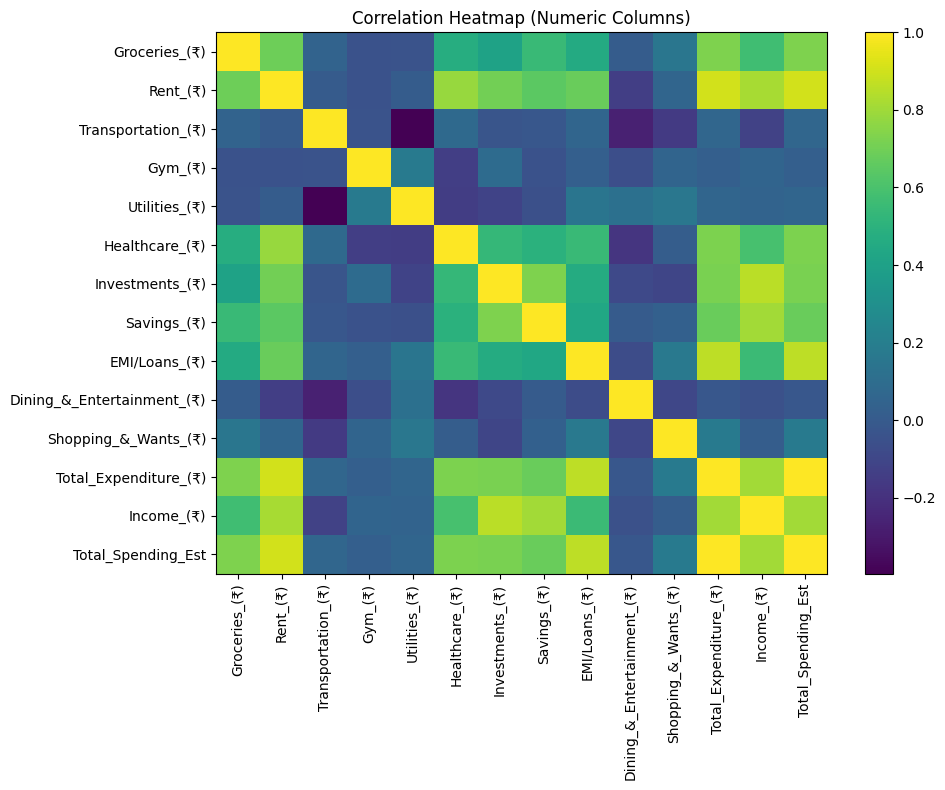

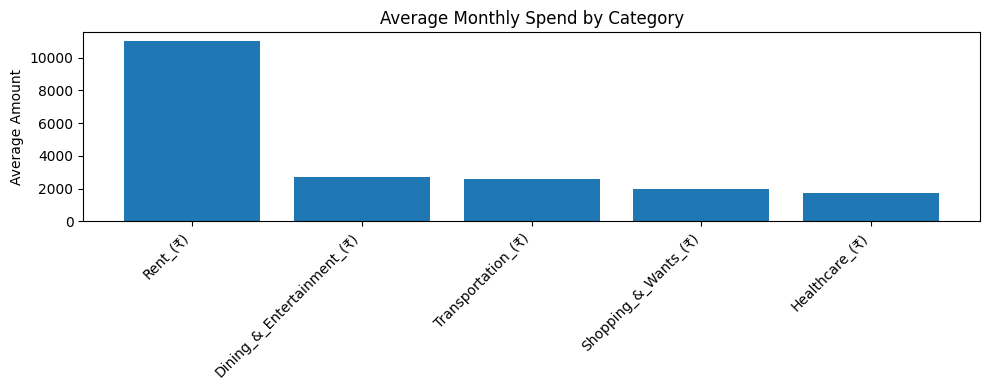

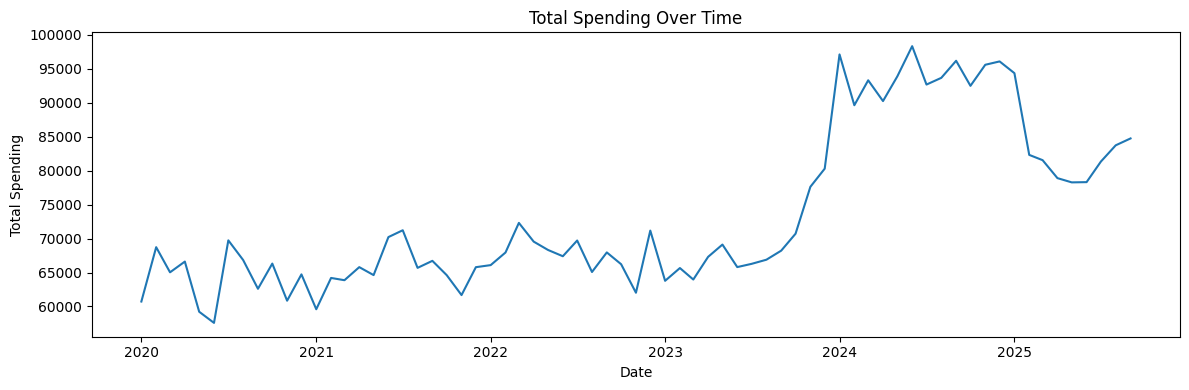

In [18]:
# 3.1 Correlation matrix (numeric)
numeric = df.select_dtypes(include=[np.number])
corr = numeric.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title('Correlation Heatmap (Numeric Columns)')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

# 3.2 Average spend by common categories (bar chart)
common_expenses = [c for c in df.columns if re.search(r'(rent|food|entertain|transport|utility|shop|health)', c, re.I)]
if common_expenses:
    means = df[common_expenses].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,4))
    plt.bar(means.index, means.values)
    plt.title('Average Monthly Spend by Category')
    plt.ylabel('Average Amount')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 3.3 Time series of total spending (line plot)
if date_col is not None:
    ts = df[[date_col, total_col]].dropna().sort_values(date_col)
    plt.figure(figsize=(12,4))
    plt.plot(ts[date_col], ts[total_col])
    plt.title('Total Spending Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Spending')
    plt.tight_layout()
    plt.show()